<a href="https://colab.research.google.com/github/prarthaana123/82-classproject/blob/main/DataStory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import statistics
import plotly.express as px 


In [4]:
from google.colab import files 
data_to_load=files.upload()
df=pd.read_csv("savings_data1.csv")
fig=px.scatter(df,y="quant_saved",color="highschool_completed")
fig.show()


Saving savings_data1.csv to savings_data1 (1).csv


In [6]:
import csv 
with open("savings_data1.csv",newline="")as f:
  reader=csv.reader(f)
  savings_data=list(reader)
savings_data.pop(0)
total_entries=len(savings_data)
total_people_given_reminder=0
for data in savings_data:
  if int(data[3])==1:
    total_people_given_reminder+=1

import plotly.graph_objects as go 
fig=go.Figure(go.Bar(x=["Reminded","Not Reminded"],y=[total_people_given_reminder,(total_entries-total_people_given_reminder)]))
fig.show()

In [7]:
all_savings=[]
for data in savings_data:
  all_savings.append(float(data[0]))
print(f"mean of savings-{statistics.mean(all_savings)}")
print(f"median of savings-{statistics.median(all_savings)}")
print(f"mode of savings-{statistics.mode(all_savings)}")

mean of savings-85.32780331328739
median of savings-39.2724
mode of savings-0.0


In [8]:
reminded_savings=[]
not_reminded_savings=[]
for data in savings_data:
  if int(data[3])==1:
    reminded_savings.append(float(data[0]))
  else:
     not_reminded_savings.append(float(data[0]))

print("results of  people who were reminded")
print(f"mean of savings-{statistics.mean(reminded_savings)}")
print(f"median of savings-{statistics.median(reminded_savings)}")
print(f"mode of savings-{statistics.mode(reminded_savings)}")


print("\n\n")
print("results of  people who were hover not reminded")
print(f"mean of savings-{statistics.mean(not_reminded_savings)}")
print(f"median of savings-{statistics.median(not_reminded_savings)}")
print(f"mode of savings-{statistics.mode(not_reminded_savings)}")

results of  people who were reminded
mean of savings-78.61157672384391
median of savings-39.2724
mode of savings-2.284



results of  people who were hover not reminded
mean of savings-87.22929365730847
median of savings-39.2724
mode of savings-0.0


In [9]:
print(f"standard deviation of all data->{statistics.stdev(all_savings)}")
print(f"standard deviation of all data->{statistics.stdev(reminded_savings)}")
print(f"standard deviation of all data->{statistics.stdev(not_reminded_savings)}")

standard deviation of all data->196.75453011909315
standard deviation of all data->164.58072141099734
standard deviation of all data->204.91519933877308


In [10]:
import plotly.figure_factory as ff 
fig=ff.create_distplot([df["quant_saved"].tolist()],["Savings"],show_hist=False)
fig.show()


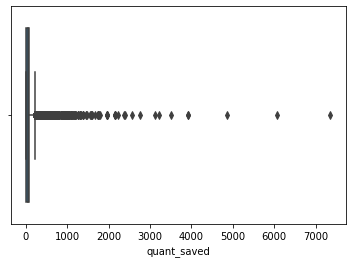

In [11]:
import seaborn as sns
sns.boxplot(data=df,x=df["quant_saved"])

In [12]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.284
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [13]:
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.20051938981879
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.86687191728863


In [14]:
import random 
sampling_mean_list=[]
for i in range(100):
  temp_list=[]
  for j in range(30):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling=statistics.mean(sampling_mean_list)

fig=ff.create_distplot([sampling_mean_list],["Savings(Sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()


In [15]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 9.309969352497033


In [16]:
print(f"Mean of Population - {statistics.mean(all_savings)}") 
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.20051938981879
Mean of Sampling Distribution - 46.00756112387833


In [26]:
import numpy as np
temp_df = new_df[new_df.quant_saved != 0]

quant_saved = temp_df["quant_saved"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(quant_saved, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")

Correlation between the age of the person and their savings is - 0.9999999999999999


In [47]:
reminded_df = new_df.loc[new_df["highschool_completed"] == 1]
not_reminded_df = new_df.loc[new_df["highschool_completed"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
28    47.178078       0                     0        0
29    98.181000       0                     0        0
38    39.272400       1                     0        0


In [48]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings (Not Reminded)"], show_hist=False)
fig.show()


In [49]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 45.4422722905034
Standard Deviation of Sampling (Not Reminded) -> 5.03117143924586


In [50]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 40.41110085125754 and First (end) - 50.473443729749256
Second (start) - 35.37992941201168 and Second (end) - 55.504615168995116
Third (start) - 30.348757972765817 and Third (end) - 60.535786608240976


In [51]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Reminded) -> 46.952475398149666
Standard Deviation of Sampling (Reminded) -> 4.943298451238443


In [52]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.3001692798352821
